In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

# EDA

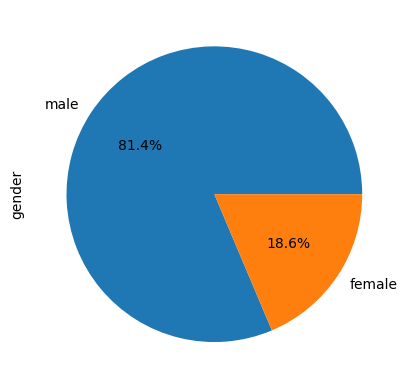

In [7]:
df['gender'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

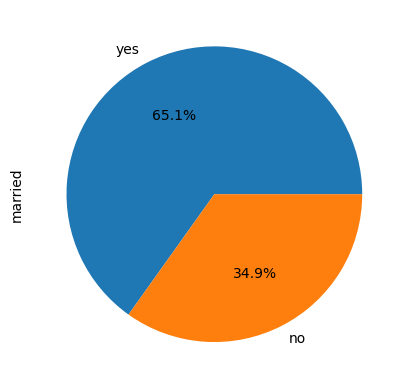

In [8]:
df['married'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

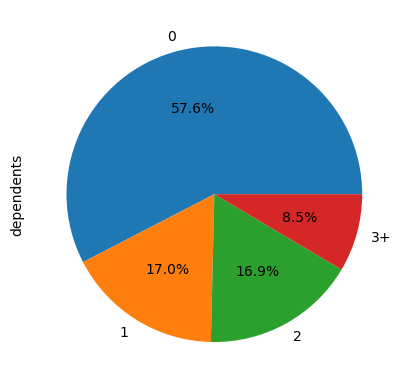

In [9]:
df['dependents'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

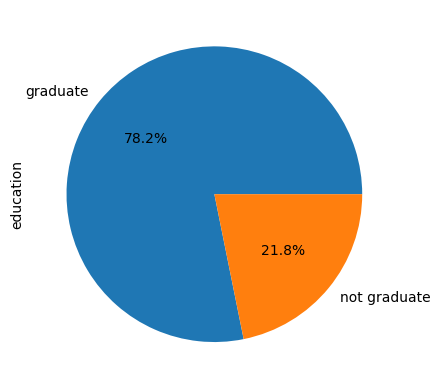

In [10]:
df['education'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

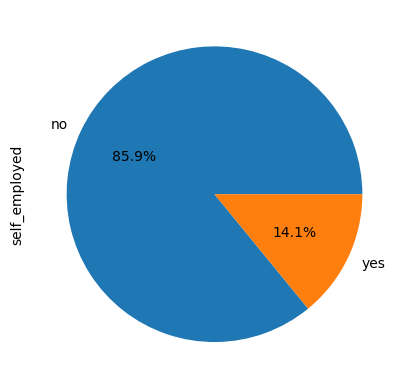

In [11]:
df['self_employed'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

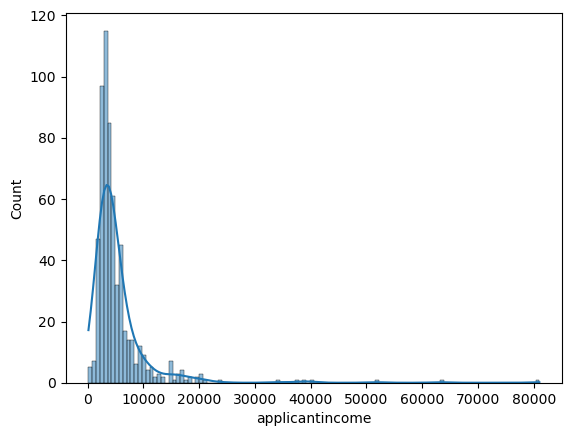

In [12]:
sns.histplot(df['applicantincome'],kde=True)
plt.show()

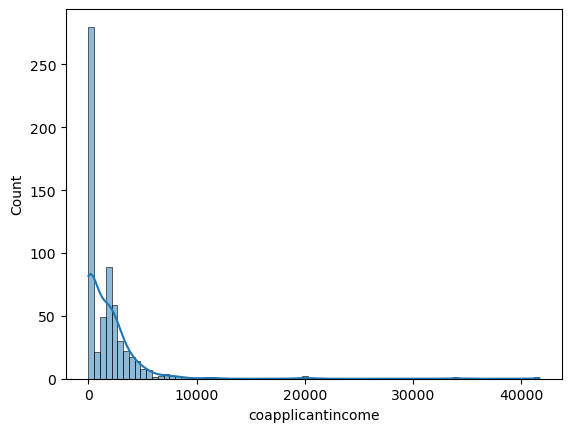

In [13]:
sns.histplot(df['coapplicantincome'],kde=True)
plt.show()

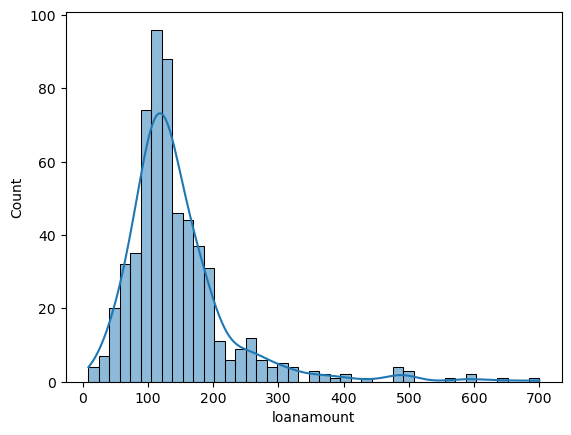

In [14]:
sns.histplot(df['loanamount'],kde=True)
plt.show()

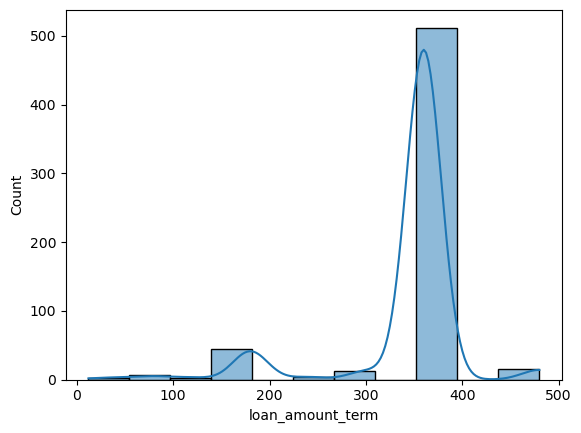

In [15]:
sns.histplot(df['loan_amount_term'],kde=True)
plt.show()

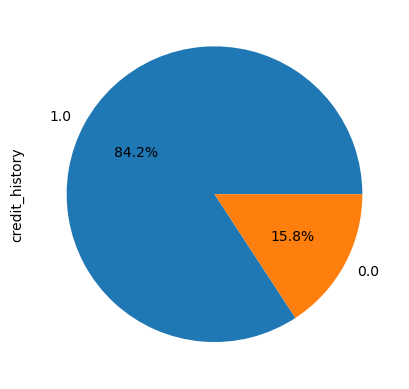

In [16]:
df['credit_history'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

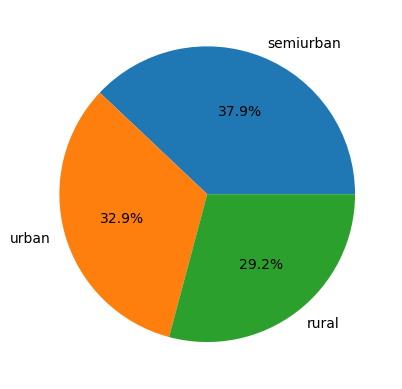

In [17]:
df['property_area'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.axis('off')
plt.show()

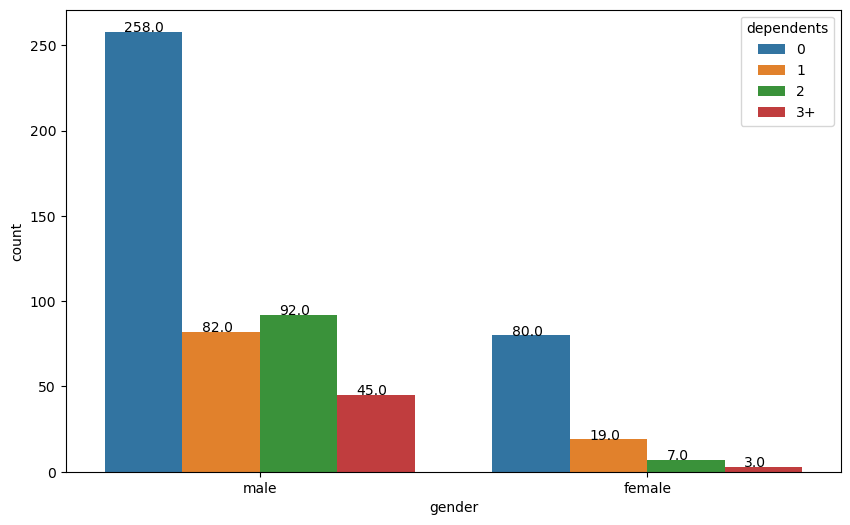

In [18]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['gender'],hue = df['dependents'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()))
plt.show()

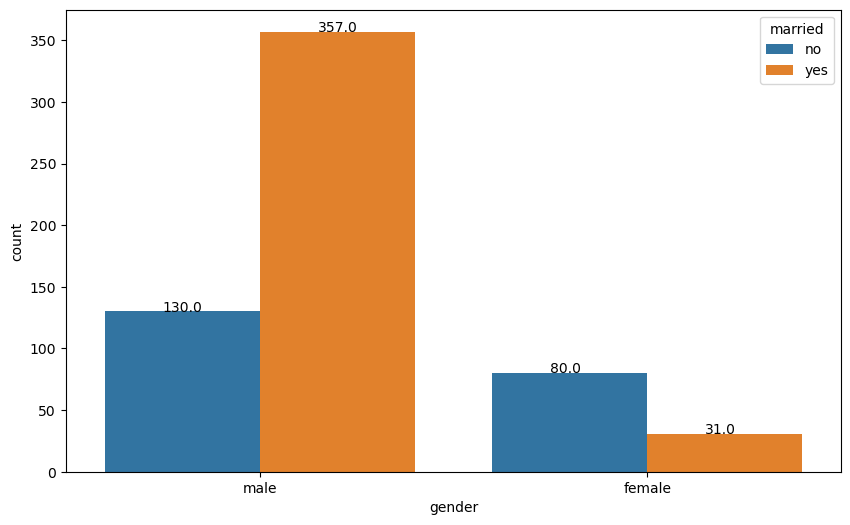

In [19]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['gender'],hue = df['married'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()))
plt.show()

In [20]:
df['sal_range'] = pd.cut(df['applicantincome'],bins =[0,2000,5000,10000,100000],right=False,labels = ['low','Avg','Med','High'])

In [21]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,sal_range
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y,Med
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n,Avg
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y,Avg
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y,Avg
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y,Med


<Axes: xlabel='sal_range'>

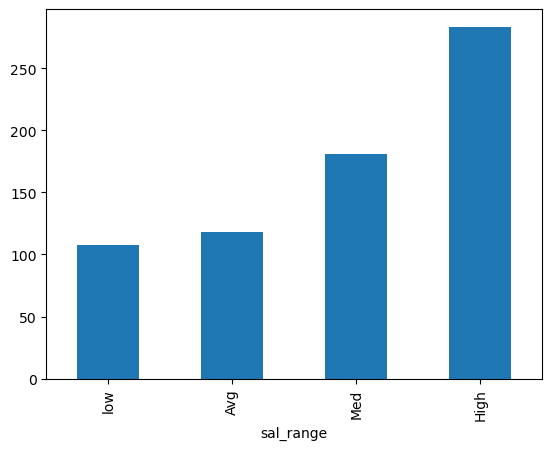

In [22]:
df.groupby('sal_range')['loanamount'].mean().plot(kind='bar')

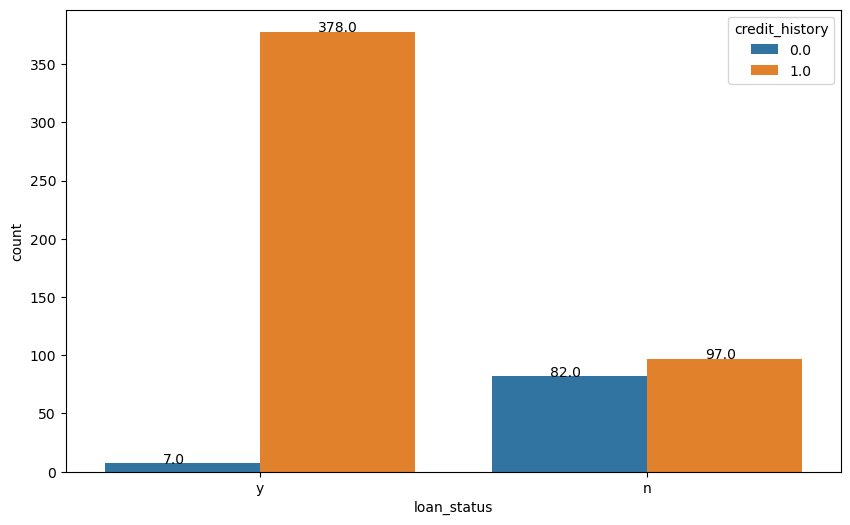

In [23]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['loan_status'],hue = df['credit_history'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()))
plt.show()

In [24]:
df[(df['loan_status']=='y')& (df['credit_history']== 0.0)]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,sal_range
122,lp001431,female,no,0,graduate,no,2137,8980.0,137.0,360.0,0.0,semiurban,y,Avg
155,lp001536,male,yes,3+,graduate,no,39999,0.0,600.0,180.0,0.0,semiurban,y,High
201,lp001677,male,no,2,graduate,no,4923,0.0,166.0,360.0,0.0,semiurban,y,Avg
267,lp001882,male,yes,3+,graduate,no,4333,1811.0,160.0,360.0,0.0,urban,y,Avg
326,lp002068,male,no,0,graduate,no,4917,0.0,130.0,360.0,0.0,rural,y,Avg
453,lp002449,male,yes,0,graduate,no,2483,2466.0,90.0,180.0,0.0,rural,y,Avg
527,lp002706,male,yes,1,not graduate,no,5285,1430.0,161.0,360.0,0.0,semiurban,y,Med


In [25]:
df[(df['loan_status']=='n')& (df['credit_history']== 0.0)]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,sal_range
7,lp001014,male,yes,3+,graduate,no,3036,2504.0,158.0,360.0,0.0,semiurban,n,Avg
17,lp001036,female,no,0,graduate,no,3510,0.0,76.0,360.0,0.0,urban,n,Avg
20,lp001043,male,yes,0,not graduate,no,7660,0.0,104.0,360.0,0.0,urban,n,Med
22,lp001047,male,yes,0,not graduate,no,2600,1911.0,116.0,360.0,0.0,semiurban,n,Avg
23,lp001050,NaN,yes,2,not graduate,no,3365,1917.0,112.0,360.0,0.0,rural,n,Avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,lp002872,NaN,yes,0,graduate,no,3087,2210.0,136.0,360.0,0.0,semiurban,n,Avg
584,lp002911,male,yes,1,graduate,no,2787,1917.0,146.0,360.0,0.0,rural,n,Avg
589,lp002926,male,yes,2,graduate,yes,2726,0.0,106.0,360.0,0.0,semiurban,n,Avg
597,lp002943,male,no,NaN,graduate,no,2987,0.0,88.0,360.0,0.0,semiurban,n,Avg


In [26]:
df[(df['loan_status']=='n')& (df['credit_history']== 1.0)]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,sal_range
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n,Avg
9,lp001020,male,yes,1,graduate,no,12841,10968.0,349.0,360.0,1.0,semiurban,n,High
13,lp001029,male,no,0,graduate,no,1853,2840.0,114.0,360.0,1.0,rural,n,low
18,lp001038,male,yes,0,not graduate,no,4887,0.0,133.0,360.0,1.0,rural,n,Avg
28,lp001086,male,no,0,not graduate,no,1442,0.0,35.0,360.0,1.0,urban,n,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,lp002893,male,no,0,graduate,no,1836,33837.0,90.0,360.0,1.0,urban,n,low
585,lp002912,male,yes,1,graduate,no,4283,3000.0,172.0,84.0,1.0,rural,n,Avg
591,lp002931,male,yes,2,graduate,yes,6000,0.0,205.0,240.0,1.0,semiurban,n,Med
596,lp002941,male,yes,2,not graduate,yes,6383,1000.0,187.0,360.0,1.0,rural,n,Med


In [27]:
num = [col for col in df.columns if (df[col].dtypes=='int64') or (df[col].dtypes=='float64')]

In [28]:
cat = [col for col in df.columns if df[col].dtypes=='O']

In [29]:
df[num]

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [30]:
df.dtypes

loan_id                object
gender                 object
married                object
dependents             object
education              object
self_employed          object
applicantincome         int64
coapplicantincome     float64
loanamount            float64
loan_amount_term      float64
credit_history        float64
property_area          object
loan_status            object
sal_range            category
dtype: object

In [31]:
num[:3]

['applicantincome', 'coapplicantincome', 'loanamount']

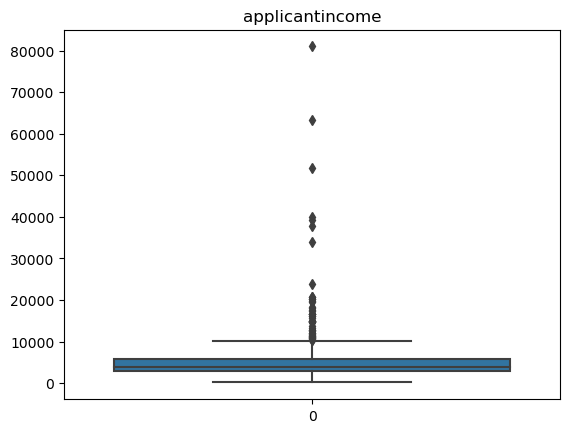

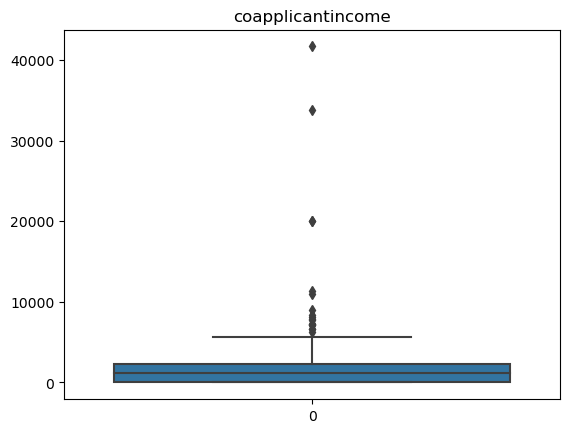

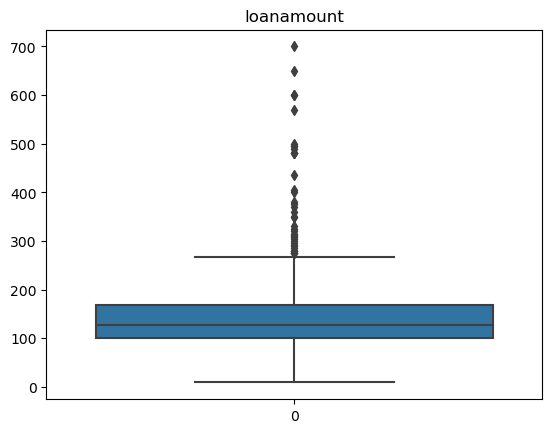

In [32]:
for col in num[:3]:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(col)

# Feature Engineering

#### Handling missing values

In [33]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
sal_range             0
dtype: int64

In [34]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['married'].fillna(df['married'].mode()[0],inplace=True)
df['dependents'].fillna(df['dependents'].mode()[0],inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].mode()[0],inplace=True)
df['credit_history'].fillna(df['credit_history'].mode()[0],inplace=True)

In [35]:
df.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
sal_range             0
dtype: int64

In [36]:
df['loanamount'].fillna(df.groupby('sal_range')['loanamount'].mean())

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: loanamount, Length: 614, dtype: float64

In [37]:
df['loanamount'][df['sal_range']=='low'].fillna(df[df['sal_range']=='low']['loanamount'].mean(),inplace=True)


In [38]:
df['loanamount'][df['sal_range']=='low'].fillna(df[df['sal_range']=='low']['loanamount'].mean(),inplace=True)

In [39]:
df[df['sal_range']=='low']['loanamount'].mean()

107.97435897435898

In [40]:
df[df['sal_range']=='low'] =df[df['sal_range']=='low'].fillna(df[df['sal_range']=='low']['loanamount'].mean())

In [41]:
df[df['sal_range']=='Med'] =df[df['sal_range']=='Med'].fillna(df[df['sal_range']=='Med']['loanamount'].mean())

In [42]:
df[df['sal_range']=='Avg'] =df[df['sal_range']=='Avg'].fillna(df[df['sal_range']=='Avg']['loanamount'].mean())

In [43]:
df[df['sal_range']=='High'] =df[df['sal_range']=='High'].fillna(df[df['sal_range']=='High']['loanamount'].mean())

In [44]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
sal_range            0
dtype: int64

####  Handling Skewed data

<Axes: >

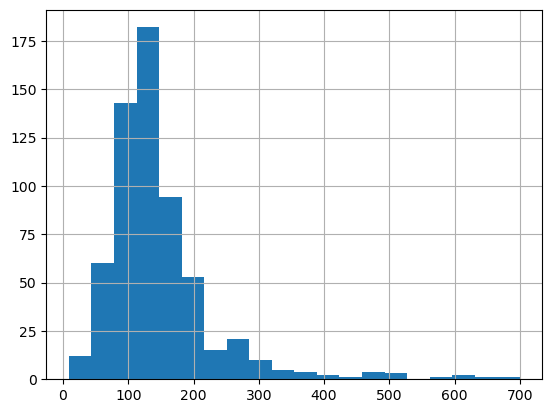

In [45]:
df['loanamount'].hist(bins=20)

<Axes: >

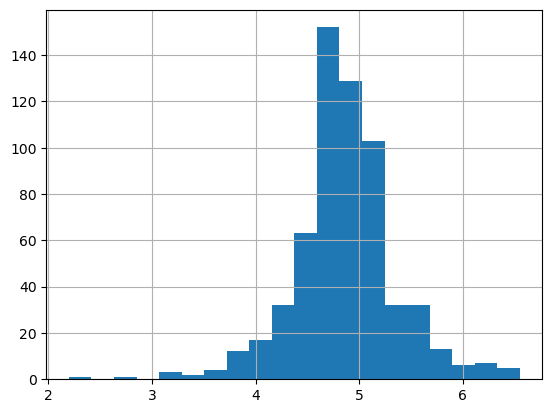

In [46]:
## Applying log transformation
df['loanamount'] = np.log(df['loanamount'])
df['loanamount'].hist(bins=20)

In [47]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,sal_range
0,lp001002,male,no,0,graduate,no,5849,0.0,5.198013,360.0,1.0,urban,y,Med
1,lp001003,male,yes,1,graduate,no,4583,1508.0,4.852030,360.0,1.0,rural,n,Avg
2,lp001005,male,yes,0,graduate,yes,3000,0.0,4.189655,360.0,1.0,urban,y,Avg
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,4.787492,360.0,1.0,urban,y,Avg
4,lp001008,male,no,0,graduate,no,6000,0.0,4.948760,360.0,1.0,urban,y,Med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,female,no,0,graduate,no,2900,0.0,4.262680,360.0,1.0,rural,y,Avg
610,lp002979,male,yes,3+,graduate,no,4106,0.0,3.688879,180.0,1.0,rural,y,Avg
611,lp002983,male,yes,1,graduate,no,8072,240.0,5.533389,360.0,1.0,urban,y,Med
612,lp002984,male,yes,2,graduate,no,7583,0.0,5.231109,360.0,1.0,urban,y,Med


In [48]:
# Adding a new column
df['total_income'] = df['applicantincome']+df['coapplicantincome']
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,sal_range,total_income
0,lp001002,male,no,0,graduate,no,5849,0.0,5.198013,360.0,1.0,urban,y,Med,5849.0
1,lp001003,male,yes,1,graduate,no,4583,1508.0,4.852030,360.0,1.0,rural,n,Avg,6091.0
2,lp001005,male,yes,0,graduate,yes,3000,0.0,4.189655,360.0,1.0,urban,y,Avg,3000.0
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,4.787492,360.0,1.0,urban,y,Avg,4941.0
4,lp001008,male,no,0,graduate,no,6000,0.0,4.948760,360.0,1.0,urban,y,Med,6000.0


<Axes: >

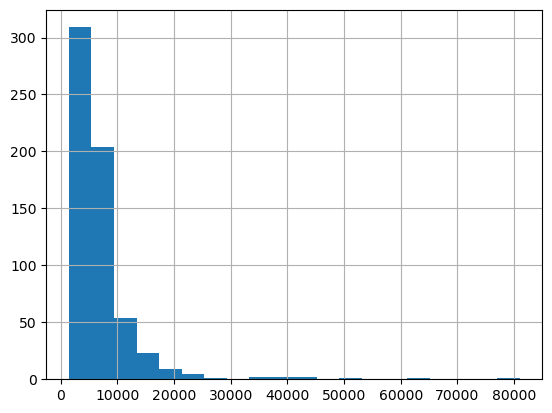

In [49]:
df['total_income'].hist(bins=20)

<Axes: >

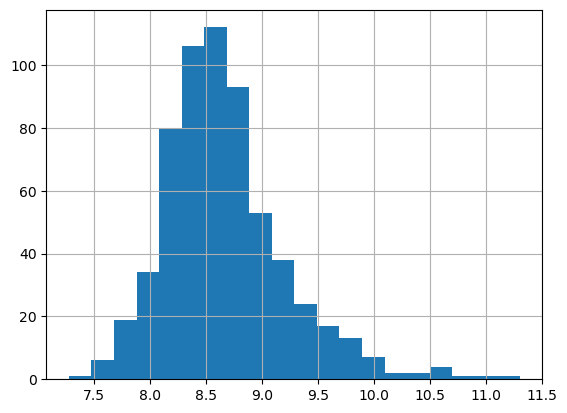

In [50]:
df['total_income'] = np.log(df['total_income'])
df['total_income'].hist(bins=20)

In [51]:
df.drop(['loan_id','property_area','sal_range'],axis=1,inplace=True)

In [52]:
cat = [col for col in df.columns if df[col].dtypes=='O']

In [53]:
cat

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'loan_status']

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
for col in cat:
    df[col]=le.fit_transform(df[col])

In [56]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,total_income
0,1,0,0,0,0,5849,0.0,5.198013,360.0,1.0,1,8.674026
1,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,8.714568
2,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,1,8.006368
3,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,1,8.505323
4,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,1,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,4.262680,360.0,1.0,1,7.972466
610,1,1,3,0,0,4106,0.0,3.688879,180.0,1.0,1,8.320205
611,1,1,1,0,0,8072,240.0,5.533389,360.0,1.0,1,9.025456
612,1,1,2,0,0,7583,0.0,5.231109,360.0,1.0,1,8.933664


In [57]:
df.to_csv('cleaned_and_label_encoded_data.csv')

In [58]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,total_income
0,1,0,0,0,0,5849,0.0,5.198013,360.0,1.0,1,8.674026
1,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,8.714568
2,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,1,8.006368
3,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,1,8.505323
4,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,1,8.699515


In [59]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [61]:
X.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,total_income
0,1,0,0,0,0,5849,0.0,5.198013,360.0,1.0,8.674026
1,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,8.714568
2,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,8.006368
3,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,8.505323
4,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,8.699515


In [62]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loan_status, Length: 614, dtype: int32

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =0)

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [65]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV

In [72]:
rs = np.arange(10,60,2)

In [75]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'random_state': np.arange(10,60,2)
}

In [88]:
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")

In [89]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 1250 candidates, totalling 12500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'random_state': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58])},
             scoring='accuracy', verbose=1)

In [90]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=22)

In [91]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=2, min_samples_leaf=5, random_state=10)

In [92]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       random_state=10)

In [93]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [94]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)

In [95]:
acc

0.8211382113821138

In [84]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train,y_train)

GaussianNB()

In [85]:
nb_pred = nbc.predict(X_test)
nb_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [86]:
nbacc = accuracy_score(nb_pred,y_test)

In [87]:
nbacc

0.8292682926829268

In [96]:
import pickle
pickle.dump(dt, open('DecisionTreeModel.pkl','wb'))